# Coverage of TAF1 gene

Author: Alan Lorenzetti    
Date: 01/13/2025    

This script will take coverage files of good quality (mapq 60) proper pairs and create coverage tracks to observe the intron 32 retention and potentially the 3'/5' ratio in _TAF1_ gene.

## Setting up

In [1]:
# setting up ####
# loading libs
packs = c(
 "tidyverse",
 "ggpubr",
 "ggthemes",
 "viridis",
 "Gviz",
 "BSgenome",
 "rtracklayer",
 "GenomicRanges"
)

lapply(packs, require, character.only = TRUE)

theme_set(theme_pubr())

if(!dir.exists("../_m")){dir.create("../_m")}
setwd("../_m")

Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: ggpubr



Loading required package: ggthemes



Loading required package: viridis



Loading required package: viridisLite



Loading required package: Gviz



Loading required package: S4Vectors



Loading required package: stats4



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min





Attaching package: ‘S4Vectors’




The following objects are masked from ‘package:lubridate’:

    second, second<-




The following objects are masked from ‘package:dplyr’:

    first, rename




The following object is masked from ‘package:tidyr’:

    expand




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges




Attaching package: ‘IRanges’




The following object is masked from ‘package:lubridate’:

    %within%




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




The following object is masked from ‘package:purrr’:

    reduce




Loading required package: GenomicRanges



Loading required package: GenomeInfoDb



Loading required package: grid



Loading required package: BSgenome



Loading required package: Biostrings



Loading required package: XVector




Attaching package: 'XVector'




The following object is masked from 'package:purrr':

    compact





Attaching package: 'Biostrings'




The following object is masked from 'package:grid':

    pattern




The following object is masked from 'package:base':

    strsplit




Loading required package: BiocIO



Loading required package: rtracklayer




Attaching package: 'rtracklayer'




The following object is masked from 'package:BiocIO':

    FileForFormat




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

## Getting started

In [2]:
# reading sequence
genome = readDNAStringSet(filepath = "GRCh38_with_XDP_SVA.primary_assembly.genome.fa")

In [3]:
gtf = rtracklayer::import("gencode.v37.with_xdp_sva.primary_assembly.annotation_sorted.gtf.gz")

In [4]:
taf1_gene = gtf[gtf$gene_id == "ENSG00000147133.16" & gtf$type == "gene"]
taf1_gene

GRanges object with 1 range and 21 metadata columns:
      seqnames            ranges strand |   source     type     score     phase
         <Rle>         <IRanges>  <Rle> | <factor> <factor> <numeric> <integer>
  [1]     chrX 71366264-71535001      + |   HAVANA     gene        NA      <NA>
                 gene_id transcript_id      gene_type   gene_name
             <character>   <character>    <character> <character>
  [1] ENSG00000147133.16          <NA> protein_coding        TAF1
      transcript_type transcript_name exon_number     exon_id       level
          <character>     <character> <character> <character> <character>
  [1]            <NA>            <NA>        <NA>        <NA>           1
      transcript_support_level     hgnc_id         tag          havana_gene
                   <character> <character> <character>          <character>
  [1]                     <NA>  HGNC:11535  ncRNA_host OTTHUMG00000022723.7
      havana_transcript         ont  protein_id      ccdsid

In [5]:
taf1_transcript = gtf[gtf$transcript_id == "ENST00000423759.6" &
                       (gtf$type == "exon" | gtf$type == "UTR")]
taf1_transcript

GRanges object with 40 ranges and 21 metadata columns:
       seqnames            ranges strand |   source     type     score
          <Rle>         <IRanges>  <Rle> | <factor> <factor> <numeric>
   [1]     chrX 71366357-71366494      + |   HAVANA     exon        NA
   [2]     chrX 71366357-71366374      + |   HAVANA     UTR         NA
   [3]     chrX 71367499-71367613      + |   HAVANA     exon        NA
   [4]     chrX 71368054-71368170      + |   HAVANA     exon        NA
   [5]     chrX 71375167-71375286      + |   HAVANA     exon        NA
   ...      ...               ...    ... .      ...      ...       ...
  [36]     chrX 71460868-71460993      + |   HAVANA     exon        NA
  [37]     chrX 71462179-71462335      + |   HAVANA     exon        NA
  [38]     chrX 71463253-71463430      + |   HAVANA     exon        NA
  [39]     chrX 71466451-71468632      + |   HAVANA     exon        NA
  [40]     chrX 71466671-71468632      + |   HAVANA     UTR         NA
           phase      

In [6]:
# Get transcript boundaries for plotting
transcript_start = min(start(taf1_transcript))-1000
transcript_end = max(end(taf1_transcript))+1000

In [7]:
taf1_model = data.frame(chromosome = seqnames(taf1_transcript),
                             start = start(taf1_transcript),
                             end = end(taf1_transcript),
                             width = width(taf1_transcript),
                             strand = strand(taf1_transcript),
                             feature_type = taf1_transcript$type,
                             gene = "TAF1",
                             exon = taf1_transcript$exon_id,
                             transcript = taf1_transcript$transcript_id,
                             symbol = "TAF1") %>%
    mutate(feature_type = ifelse(feature_type == "exon", "protein_coding", as.character(feature_type))) %>%
    mutate(feature_type = ifelse(feature_type == "UTR" & start == 71366357, "utr5", as.character(feature_type))) %>%
    mutate(feature_type = ifelse(feature_type == "UTR" & start == 71466671, "utr3", as.character(feature_type))) %>%
    filter(!str_detect(feature_type, "utr"))

taf1_model

chromosome,start,end,width,strand,feature_type,gene,exon,transcript,symbol
<fct>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
chrX,71366357,71366494,138,+,protein_coding,TAF1,ENSE00002057736.2,ENST00000423759.6,TAF1
chrX,71367499,71367613,115,+,protein_coding,TAF1,ENSE00001693606.1,ENST00000423759.6,TAF1
chrX,71368054,71368170,117,+,protein_coding,TAF1,ENSE00001806491.1,ENST00000423759.6,TAF1
chrX,71375167,71375286,120,+,protein_coding,TAF1,ENSE00001762844.1,ENST00000423759.6,TAF1
chrX,71376950,71377191,242,+,protein_coding,TAF1,ENSE00001615535.1,ENST00000423759.6,TAF1
chrX,71377603,71377821,219,+,protein_coding,TAF1,ENSE00001657433.1,ENST00000423759.6,TAF1
chrX,71378235,71378453,219,+,protein_coding,TAF1,ENSE00001610045.1,ENST00000423759.6,TAF1
chrX,71378824,71379031,208,+,protein_coding,TAF1,ENSE00001671320.1,ENST00000423759.6,TAF1
chrX,71381743,71381919,177,+,protein_coding,TAF1,ENSE00001748084.1,ENST00000423759.6,TAF1


## Striatal organoids metadata

In [8]:
# reading metadata
metadata = read_tsv("xdp_bulkrnaseq_metadata.tsv")

Rows: 41 Columns: 10


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): Differentiation_cohort, Sample, iPSC_line, Cell_line, Sex, Kit, Dis...
dbl (3): Day_of_Maturation, RIN, individual



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# Get list of bedgraph files
bedgraph_files = list.files(
    path = "../../_m", 
    pattern = ".*_expanded.bedgraph$",
    full.names = TRUE
)
bedgraph_files %>% head()

[1] "../../_m/12N__DELTA-SVA-XDP__33109.2G-2F2__90__fwd_expanded.bedgraph"
[2] "../../_m/12N__DELTA-SVA-XDP__33109.2G-2F2__90__rev_expanded.bedgraph"
[3] "../../_m/13N__Control__33113.2I__120__fwd_expanded.bedgraph"         
[4] "../../_m/13N__Control__33113.2I__120__rev_expanded.bedgraph"         
[5] "../../_m/14N__XDP__33109.2G__120__fwd_expanded.bedgraph"             
[6] "../../_m/14N__XDP__33109.2G__120__rev_expanded.bedgraph"

In [10]:
bedgraph_tibble = tibble(filepath = bedgraph_files,
                         filename = basename(bedgraph_files),
                         sample = filename %>% str_replace("^(.*?)__.*$", "\\1")) %>%
                  mutate(orientation = ifelse(str_detect(filename, "__fwd_expanded\\."), "forward", "reverse")) %>%
                  left_join(x = ., y = metadata,
                            by = c("sample" = "Sample")) %>%
      mutate(display_name = paste0(Cell_line,"__",iPSC_line,"__",Day_of_Maturation))
bedgraph_tibble %>% head()

filepath,filename,sample,orientation,Differentiation_cohort,iPSC_line,Cell_line,Sex,Day_of_Maturation,RIN,Kit,Disease_Status,individual,display_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
../../_m/12N__DELTA-SVA-XDP__33109.2G-2F2__90__fwd_expanded.bedgraph,12N__DELTA-SVA-XDP__33109.2G-2F2__90__fwd_expanded.bedgraph,12N,forward,A,33109.2G-2F2,DELTA-SVA-XDP,Male,90,6.2,Zymo_R2062,healthy,33109,DELTA-SVA-XDP__33109.2G-2F2__90
../../_m/12N__DELTA-SVA-XDP__33109.2G-2F2__90__rev_expanded.bedgraph,12N__DELTA-SVA-XDP__33109.2G-2F2__90__rev_expanded.bedgraph,12N,reverse,A,33109.2G-2F2,DELTA-SVA-XDP,Male,90,6.2,Zymo_R2062,healthy,33109,DELTA-SVA-XDP__33109.2G-2F2__90
../../_m/13N__Control__33113.2I__120__fwd_expanded.bedgraph,13N__Control__33113.2I__120__fwd_expanded.bedgraph,13N,forward,A,33113.2I,Control,Male,120,8.5,Zymo_R2062,healthy,33113,Control__33113.2I__120
../../_m/13N__Control__33113.2I__120__rev_expanded.bedgraph,13N__Control__33113.2I__120__rev_expanded.bedgraph,13N,reverse,A,33113.2I,Control,Male,120,8.5,Zymo_R2062,healthy,33113,Control__33113.2I__120
../../_m/14N__XDP__33109.2G__120__fwd_expanded.bedgraph,14N__XDP__33109.2G__120__fwd_expanded.bedgraph,14N,forward,A,33109.2G,XDP,Male,120,7.1,Zymo_R2062,patient,33109,XDP__33109.2G__120
../../_m/14N__XDP__33109.2G__120__rev_expanded.bedgraph,14N__XDP__33109.2G__120__rev_expanded.bedgraph,14N,reverse,A,33109.2G,XDP,Male,120,7.1,Zymo_R2062,patient,33109,XDP__33109.2G__120


## Making an alternative data structure

In [11]:
# in this function, taking a
# tibble as output, it will
# create a huge data frame
# with coordinates within the proposed range
# Function to read and process a single bedgraph file
read_single_bedgraph = function(filepath, chr, start_pos, end_pos) {
    read_tsv(filepath, 
             col_names = c("chromosome", "start", "end", "score"),
             show_col_types = FALSE) %>%
        mutate(start = start + 1) %>%
        # Filter for chromosome and coordinate range
        filter(chromosome == chr,
               start >= start_pos,
               end <= end_pos)
}

# Function to process all bedgraph files and merge with metadata
read_bedgraphs_into_tib = function(input_tibble, chr, start, end) {
    map_dfr(1:nrow(input_tibble), function(i) {
        read_single_bedgraph(input_tibble$filepath[i], chr, start, end) %>%
            # Add sample information and join with metadata
            mutate(sample = input_tibble$sample[i],
                   orientation = input_tibble$orientation[i]) %>%
            left_join(select(input_tibble, -filepath, -filename),
                     by = c("sample", "orientation"))
    })
}

# function to include only the exons of taf1_model
filter_to_protein_coding = function(data_tibble, model) {
    # Get only protein_coding regions from model
    coding_regions = model %>%
        filter(feature_type == "protein_coding") %>%
        select(start, end)
    
    # Filter data to only include ranges that overlap with protein coding regions
    data_tibble %>%
        filter(map_lgl(1:n(), function(i) {
            any(
                data_tibble$start[i] >= coding_regions$start & 
                data_tibble$end[i] <= coding_regions$end
            )
        }))
}

# function to include only the exons of taf1_model
filter_ranges = function(full_tibble, ranges_of_interest) {
  # Load necessary library
  library(GenomicRanges)
  
  # Convert to GenomicRanges
  full_gr = GRanges(
    seqnames = full_tibble$chromosome,
    ranges = IRanges(start = full_tibble$start, end = full_tibble$end),
    score = full_tibble$score
  )
  
  interest_gr = GRanges(
    seqnames = ranges_of_interest$chromosome,
    ranges = IRanges(start = ranges_of_interest$start, end = ranges_of_interest$end)
  )
  
  # Find overlaps
  overlaps = findOverlaps(full_gr, interest_gr)
  
  # Filter the full tibble based on overlaps
  filtered_tibble = full_tibble[queryHits(overlaps), ]
  
  return(filtered_tibble)
}

In [12]:
bedgraph_tibble_to_load_vfos = bedgraph_tibble %>%
    filter(orientation == "forward") %>%
    filter(Cell_line != "Carrier-Mutant") %>%
    filter(Cell_line != "Control") %>%
    mutate(Day_of_Maturation = as.character(Day_of_Maturation)) %>%
    select(filepath, filename, sample, orientation,
           iPSC_line,Cell_line,Sex,
           Day_of_Maturation,
           Individual = individual,
           display_name)
bedgraph_tibble_to_load_vfos %>% head()

filepath,filename,sample,orientation,iPSC_line,Cell_line,Sex,Day_of_Maturation,Individual,display_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
../../_m/12N__DELTA-SVA-XDP__33109.2G-2F2__90__fwd_expanded.bedgraph,12N__DELTA-SVA-XDP__33109.2G-2F2__90__fwd_expanded.bedgraph,12N,forward,33109.2G-2F2,DELTA-SVA-XDP,Male,90,33109,DELTA-SVA-XDP__33109.2G-2F2__90
../../_m/14N__XDP__33109.2G__120__fwd_expanded.bedgraph,14N__XDP__33109.2G__120__fwd_expanded.bedgraph,14N,forward,33109.2G,XDP,Male,120,33109,XDP__33109.2G__120
../../_m/15N__DELTA-SVA-XDP__33109.2G-1A4__120__fwd_expanded.bedgraph,15N__DELTA-SVA-XDP__33109.2G-1A4__120__fwd_expanded.bedgraph,15N,forward,33109.2G-1A4,DELTA-SVA-XDP,Male,120,33109,DELTA-SVA-XDP__33109.2G-1A4__120
../../_m/16N__DELTA-SVA-XDP__33109.2G-2F2__120__fwd_expanded.bedgraph,16N__DELTA-SVA-XDP__33109.2G-2F2__120__fwd_expanded.bedgraph,16N,forward,33109.2G-2F2,DELTA-SVA-XDP,Male,120,33109,DELTA-SVA-XDP__33109.2G-2F2__120
../../_m/18N__XDP__33109.2B__30__fwd_expanded.bedgraph,18N__XDP__33109.2B__30__fwd_expanded.bedgraph,18N,forward,33109.2B,XDP,Male,30,33109,XDP__33109.2B__30
../../_m/19N__DELTA-SVA-XDP__33109.2B-3A12__30__fwd_expanded.bedgraph,19N__DELTA-SVA-XDP__33109.2B-3A12__30__fwd_expanded.bedgraph,19N,forward,33109.2B-3A12,DELTA-SVA-XDP,Male,30,33109,DELTA-SVA-XDP__33109.2B-3A12__30


In [13]:
bedgraph_tibble_to_load = bind_rows(bedgraph_tibble_to_load_vfos) %>%
    mutate(Day_of_Maturation = factor(Day_of_Maturation, levels = c("30", "60", "90", "120")))

In [14]:
coverage_data = read_bedgraphs_into_tib(
    bedgraph_tibble_to_load,
    "chrX",
    71366357,
    71468632
)

## Coverage of TAF1 locus

In [15]:
options(repr.plot.width = 24, repr.plot.height = 10)
# coverage_data %>%
#     ggplot(aes(x = start, 
#                y = score, 
#                color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")),
#                group = sample)) +
#     geom_line(alpha = 0.7) +
#     geom_vline(xintercept = 71424238, linetype = "dashed") +
#     labs(x = "Genomic Position (TAF1 locus)",
#          y = "Coverage",
#          color = "Cell Line") +
#     theme_pubr() +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     facet_wrap(~ Day_of_Maturation, nrow = 5)

## Coverage of TAF1 mRNA

In [16]:
# only exon regions
coverage_data_mrna = filter_ranges(coverage_data, taf1_model)

In [17]:
# options(repr.plot.width = 24, repr.plot.height = 10)
# # Create the plot with both individual lines and group averages
# coverage_data_mrna %>%
#     ggplot(aes(x = as.character(start), color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_line(aes(y = score, group = sample), alpha = 0.8) +
#     geom_vline(xintercept = "71424238", linetype = "dashed") +
#     # geom_vline(xintercept = taf1_model$end-taf1_model$end[1]) +
#     # Add average lines with larger size
#     # stat_summary(
#     #     aes(y = score, group = Cell_line),
#     #     fun = mean,
#     #     geom = "line",
#     #     linewidth = 1.2
#     # ) +
#     labs(x = "TAF1 mRNA Position",
#          y = "Coverage (CPM)",
#          color = "Cell Line") +
#     theme_pubr() +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     facet_wrap(~ Day_of_Maturation, nrow = 5)

In [18]:
options(repr.plot.width = 12, repr.plot.height = 10)
vec_labels = as.character(1:length(unique(coverage_data_mrna$start)))
names(vec_labels) = as.character(unique(coverage_data_mrna$start))
break_indices = seq(1, length(vec_labels), by = 1000)
break_values = names(vec_labels)[break_indices]
# coverage_data_mrna %>%
#     ggplot(aes(x = as.character(start), color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_line(aes(y = score, group = sample), alpha = 0.2) +
#     stat_summary(
#         aes(y = score, group = Cell_line),
#         fun = mean,
#         geom = "line",
#         linewidth = 1.2
#     ) +
#     geom_vline(xintercept = "71424238", linetype = "dashed") +
#     labs(x = "TAF1 mRNA Position",
#          y = "Coverage (CPM)",
#          color = "Cell Line") +
#     theme_pubr() +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                  "DELTA-SVA-XDP" = "#666666")) +
#     scale_x_discrete(breaks = break_values, labels = vec_labels[break_values]) +
#     facet_wrap(~ Day_of_Maturation, nrow = 5) +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [19]:
coverage_data_mrna_stats = coverage_data_mrna %>%
    group_by(chromosome, start, end, orientation, Cell_line, Day_of_Maturation) %>%
    summarise(score_mean = mean(score),
              score_sd = sd(score)) %>%
    ungroup()
coverage_data_mrna_stats %>% head()

`summarise()` has grouped output by 'chromosome', 'start', 'end',
'orientation', 'Cell_line'. You can override using the `.groups` argument.


chromosome,start,end,orientation,Cell_line,Day_of_Maturation,score_mean,score_sd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>
chrX,71366357,71366357,forward,DELTA-SVA-XDP,30,0.0601281,0.1033979
chrX,71366357,71366357,forward,DELTA-SVA-XDP,60,0.0081578,0.0163156
chrX,71366357,71366357,forward,DELTA-SVA-XDP,90,0.0000000,0.0000000
chrX,71366357,71366357,forward,DELTA-SVA-XDP,120,0.0000000,0.0000000
chrX,71366357,71366357,forward,XDP,30,0.0000000,0.0000000
chrX,71366357,71366357,forward,XDP,60,0.0000000,0.0000000


In [20]:
# options(repr.plot.width = 12, repr.plot.height = 10)
# coverage_data_mrna_stats %>%
#     mutate(relative_to_insertion = ifelse(start <= 71440515, "Exons 1-32", "Exons 33-38")) %>%
#     group_by(Day_of_Maturation, Cell_line, orientation) %>%
#     mutate(start = row_number()) %>%
#     ungroup() %>%
#     ggplot(aes(x = start, y = score_mean, color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_line(alpha = 0.8) +
#     geom_smooth(method = "lm", alpha = 0.5) +
#     stat_cor(method = "pearson") +
#     labs(x = "TAF1 mRNA Position",
#          y = "Mean coverage (CPM)",
#          color = "Cell Line") +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     theme_pubr() +
#     facet_grid(Day_of_Maturation ~ relative_to_insertion, scales = "free_x")

In [21]:
# options(repr.plot.width = 8, repr.plot.height = 10)
# coverage_data_mrna_stats %>%
#     mutate(relative_to_insertion = ifelse(start <= 71440515, "Exons 1-32", "Exons 33-38")) %>%
#     group_by(Day_of_Maturation, Cell_line, orientation) %>%
#     mutate(start = row_number()) %>%
#     ungroup() %>%
#     ggplot(aes(x = start, y = score_mean, color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_line(alpha = 0.8) +
#     geom_smooth(method = "lm", alpha = 0.5) +
#     stat_cor(method = "pearson") +
#     geom_vline(xintercept = 4771, linetype = "dashed") +
#     labs(x = "mRNA Position",
#          y = "Mean coverage (CPM)",
#          color = "Cell Line") +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     theme_pubr() +
#     facet_wrap(~ Day_of_Maturation, nrow = 5)

In [22]:
# options(repr.plot.width = 8, repr.plot.height = 10)
# coverage_data_mrna_stats %>%
#     mutate(relative_to_insertion = ifelse(start <= 71440515, "Exons 1-32", "Exons 33-38")) %>%
#     group_by(Day_of_Maturation, Cell_line, orientation) %>%
#     mutate(start = row_number()) %>%
#     ungroup() %>%
#     ggplot(aes(x = start, y = score_mean, color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_line(alpha = 0.8) +
#     geom_smooth(method = "loess", alpha = 0.5) +
#     geom_vline(xintercept = 4771, linetype = "dashed") +
#     # stat_cor(method = "pearson") +
#     labs(x = "TAF1 mRNA Position",
#          y = "Mean coverage (CPM)",
#          color = "Cell Line") +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     theme_pubr() +
#     facet_wrap(~ Day_of_Maturation, nrow = 5)

In [23]:
# options(repr.plot.width = 12, repr.plot.height = 10)
# coverage_data_mrna_stats %>%
#     mutate(relative_to_insertion = ifelse(start <= 71440515, "Exons 1-32", "Exons 33-38")) %>%
#     group_by(Day_of_Maturation, Cell_line, orientation) %>%
#     mutate(start = row_number()) %>%
#     ungroup() %>%
#     ggplot(aes(x = relative_to_insertion, y = score_mean, color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_boxplot(outlier.shape = NA) +
#     stat_compare_means(method = "wilcox.test",
#                        method.args = list(alternative = "less"),
#                        comparisons = list(c("Exons 33-38", "Exons 1-32"))) +
#     labs(x = "TAF1 Exons",
#          y = "Mean coverage (CPM)",
#          color = "Cell Line") +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     theme_pubr() +
#     facet_wrap(factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")) ~ Day_of_Maturation, nrow = 2, ncol = 4)

In [24]:
# options(repr.plot.width = 12, repr.plot.height = 5)
# coverage_data_mrna %>%
#     mutate(relative_to_insertion = ifelse(start <= 71440515, "Exons 1-32", "Exons 33-38")) %>%
#     group_by(Day_of_Maturation, Cell_line, orientation, sample) %>%
#     mutate(start = row_number()) %>%
#     group_by(Day_of_Maturation, Cell_line, orientation, relative_to_insertion, sample) %>%
#     summarise(score_mean = mean(score)) %>%
#     pivot_wider(values_from = score_mean, names_from = relative_to_insertion) %>%
#     mutate(three_by_five_ratio = `Exons 33-38`/`Exons 1-32`) %>%
#     ggplot(aes(x = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")), y = three_by_five_ratio, color = factor(Cell_line, levels = c("XDP", "DELTA-SVA-XDP")))) +
#     geom_boxplot(outlier.shape = NA) +
#     geom_jitter(width = 0.25) +
#     stat_compare_means(method = "wilcox.test",
#                        method.args = list(alternative = "less"),
#                        comparisons = list(c("XDP", "DELTA-SVA-XDP"))) +
#     labs(x = "Cell Line",
#          y = "3'/5' ratio of mean CPM",
#          color = "Cell Line") +
#     scale_color_manual(values = c("XDP" = "#FF9F55",
#                                   "DELTA-SVA-XDP" = "#666666")) +
#     theme_pubr() +
#     facet_wrap(~ Day_of_Maturation, ncol = 5)

## Creating IGV-like tracks for each time point

In [25]:
# Creating tracks iteratively
create_coverage_track = function(bedgraph_file, name, strand = "+") {
    is_minus = strand == "-"
    
    DataTrack(
        range = bedgraph_file,
        chromosome = "chrX",
        name = name,
        type = "h", 
        fill = "grey",
        col = "grey",
        transformation = if(is_minus) function(x) -log10(x+1) else function(x) log10(x+1),
        background.title = "transparent",
        col.title = "black",
        col.axis = "black",
        title.position = "right",
        ylim = c(0,1)
    )
}

get_filepath_and_call = function(track_info) {
    # Get display name and orientation from tibble row
    track_name = sprintf("%s (%s)", str_replace_all(track_info$display_name, "__", "\n"), 
                         ifelse(track_info$orientation == "reverse", "-", "+"))
    
    create_coverage_track(
        track_info$filepath,
        track_name,
        ifelse(track_info$orientation == "reverse", "-", "+")
    )
}

### Striatal organoids (d30)

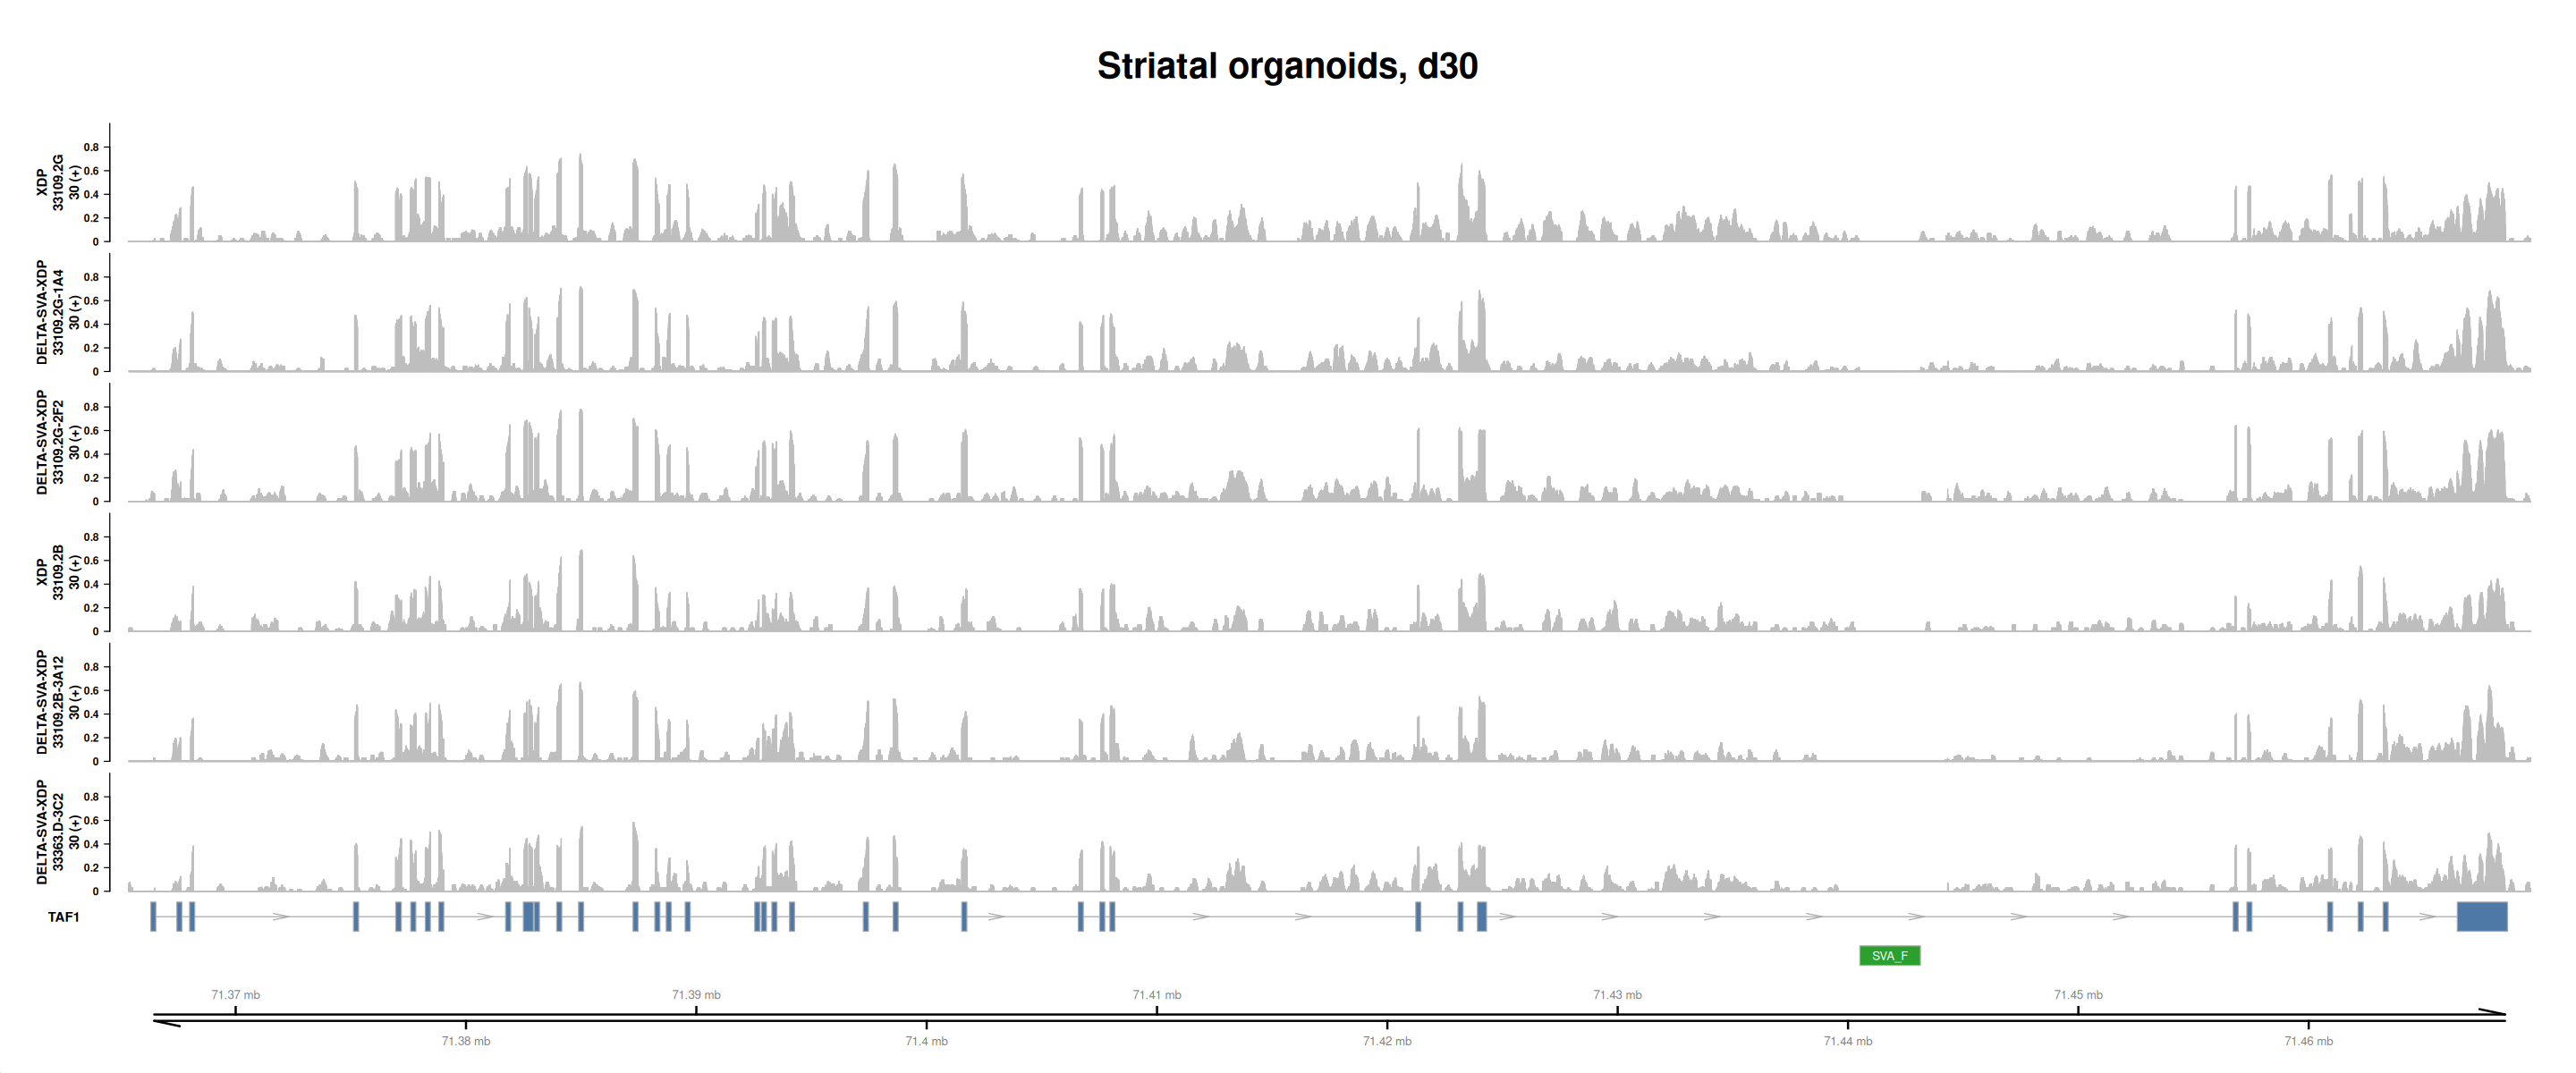

In [26]:
# subset bedgraph tracks
bedgraph_files_sub = bedgraph_tibble %>%
    filter(Cell_line != "Carrier-Mutant" & Cell_line != "Control") %>%
    # filter(Cell_line == "XDP") %>%
    filter(orientation == "forward") %>%
    filter(Day_of_Maturation == 30) %>%
    arrange(Differentiation_cohort, desc(Cell_line), Day_of_Maturation)

# Create tracks for each file
coverage_tracks = lapply(
    split(bedgraph_files_sub, 1:nrow(bedgraph_files_sub)),  # Split tibble into list of rows
    get_filepath_and_call
)

options(ucscChromosomeNames=FALSE)
options(repr.plot.width = 24, repr.plot.height = 10)
tracks_cov = c(
    coverage_tracks,
    GeneRegionTrack(taf1_model,
                    genome = genome, chromosome = "chrX", name = "TAF1", fill = "#4E79A7", size = 1.5,
                    background.title = "transparent", col.title = "black", col.axis = "black",
                    rotation.title = 0),
    AnnotationTrack(start = 71440515, end = 71443141,
                    chromosome = "chrX", name = "", id = "SVA_F",
                    showFeatureId = TRUE, size = 1.5,
                    featureAnnotation = "id", fontsize.feature = 8,
                    fill = "#2CA02C", background.title = "transparent",
                    col.title = "black", col.axis = "black"),
    GenomeAxisTrack(col = "black"))

# pdf("report__TAF1__coverage_organoids__onlycov.pdf", width = 20, height = 10)
# plotTracks(tracks_cov, chromosome = "chrX", 
#            from = transcript_start, 
#            to = transcript_end, 
#            cex.title = 0.75, 
#            title.width = 0.25)
# dev.off()

plotTracks(main = "Striatal organoids, d30",
           tracks_cov, chromosome = "chrX", 
           from = transcript_start, 
           to = transcript_end, 
           cex.title = 0.75, 
           title.width = 0.25)

### Striatal organoids (d60)

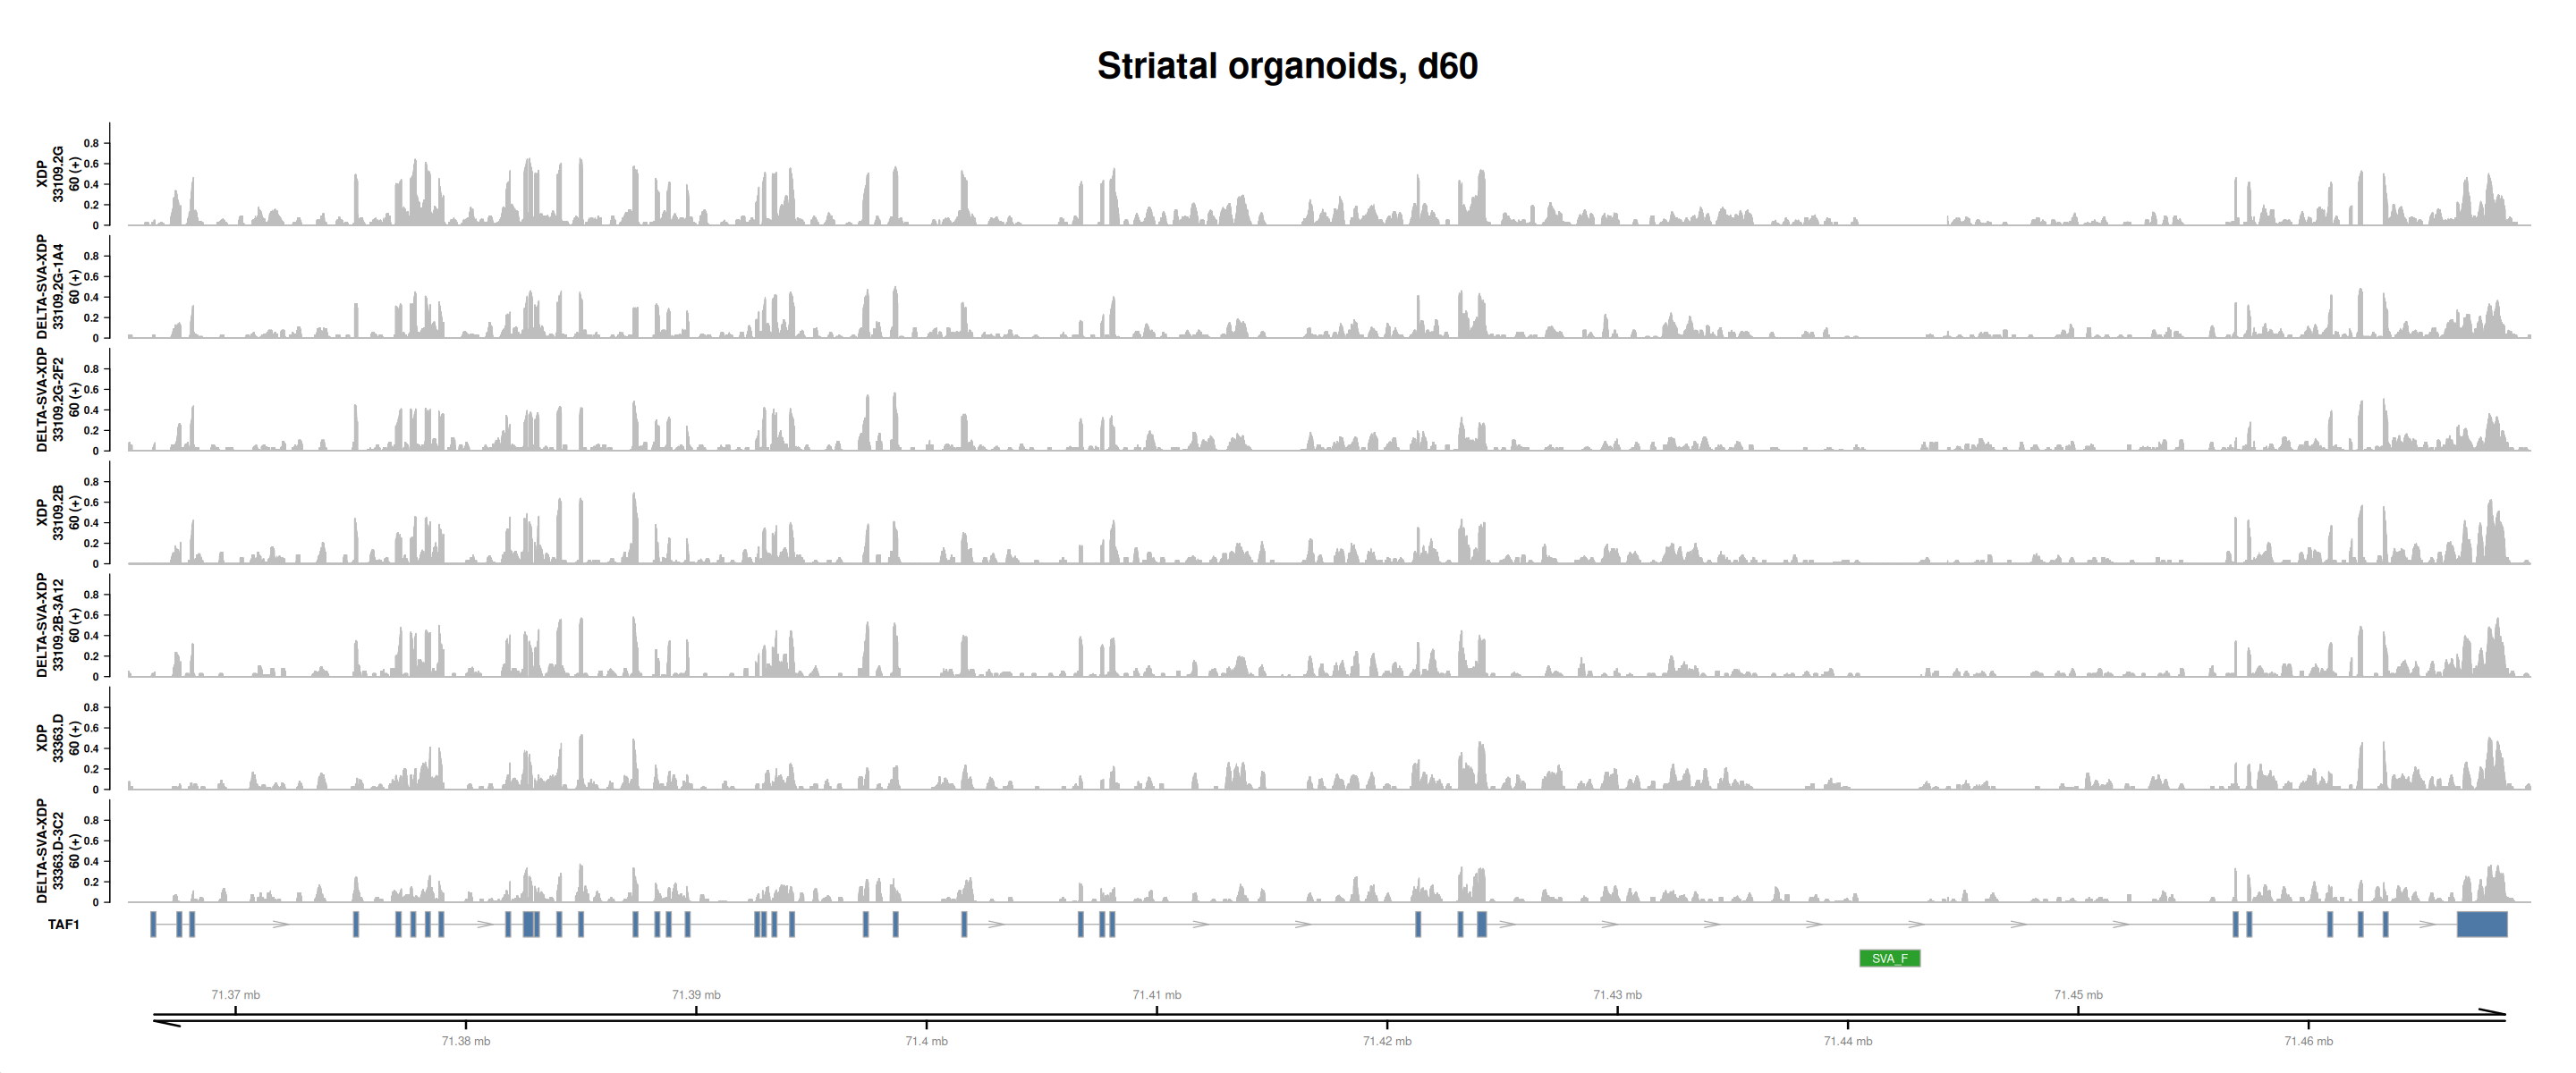

In [27]:
# subset bedgraph tracks
bedgraph_files_sub = bedgraph_tibble %>%
    filter(Cell_line != "Carrier-Mutant" & Cell_line != "Control") %>%
    # filter(Cell_line == "XDP") %>%
    filter(orientation == "forward") %>%
    filter(Day_of_Maturation == 60) %>%
    arrange(Differentiation_cohort, desc(Cell_line), Day_of_Maturation)

# Create tracks for each file
coverage_tracks = lapply(
    split(bedgraph_files_sub, 1:nrow(bedgraph_files_sub)),  # Split tibble into list of rows
    get_filepath_and_call
)

options(ucscChromosomeNames=FALSE)
options(repr.plot.width = 24, repr.plot.height = 10)
tracks_cov = c(
    coverage_tracks,
    GeneRegionTrack(taf1_model,
                    genome = genome, chromosome = "chrX", name = "TAF1", fill = "#4E79A7", size = 1.5,
                    background.title = "transparent", col.title = "black", col.axis = "black",
                    rotation.title = 0),
    AnnotationTrack(start = 71440515, end = 71443141,
                    chromosome = "chrX", name = "", id = "SVA_F",
                    showFeatureId = TRUE, size = 1.5,
                    featureAnnotation = "id", fontsize.feature = 8,
                    fill = "#2CA02C", background.title = "transparent",
                    col.title = "black", col.axis = "black"),
    GenomeAxisTrack(col = "black"))

# pdf("report__TAF1__coverage_organoids__onlycov.pdf", width = 20, height = 10)
# plotTracks(tracks_cov, chromosome = "chrX", 
#            from = transcript_start, 
#            to = transcript_end, 
#            cex.title = 0.75, 
#            title.width = 0.25)
# dev.off()

plotTracks(main = "Striatal organoids, d60",
           tracks_cov, chromosome = "chrX", 
           from = transcript_start, 
           to = transcript_end, 
           cex.title = 0.75, 
           title.width = 0.25)

### Striatal organoids (d90)

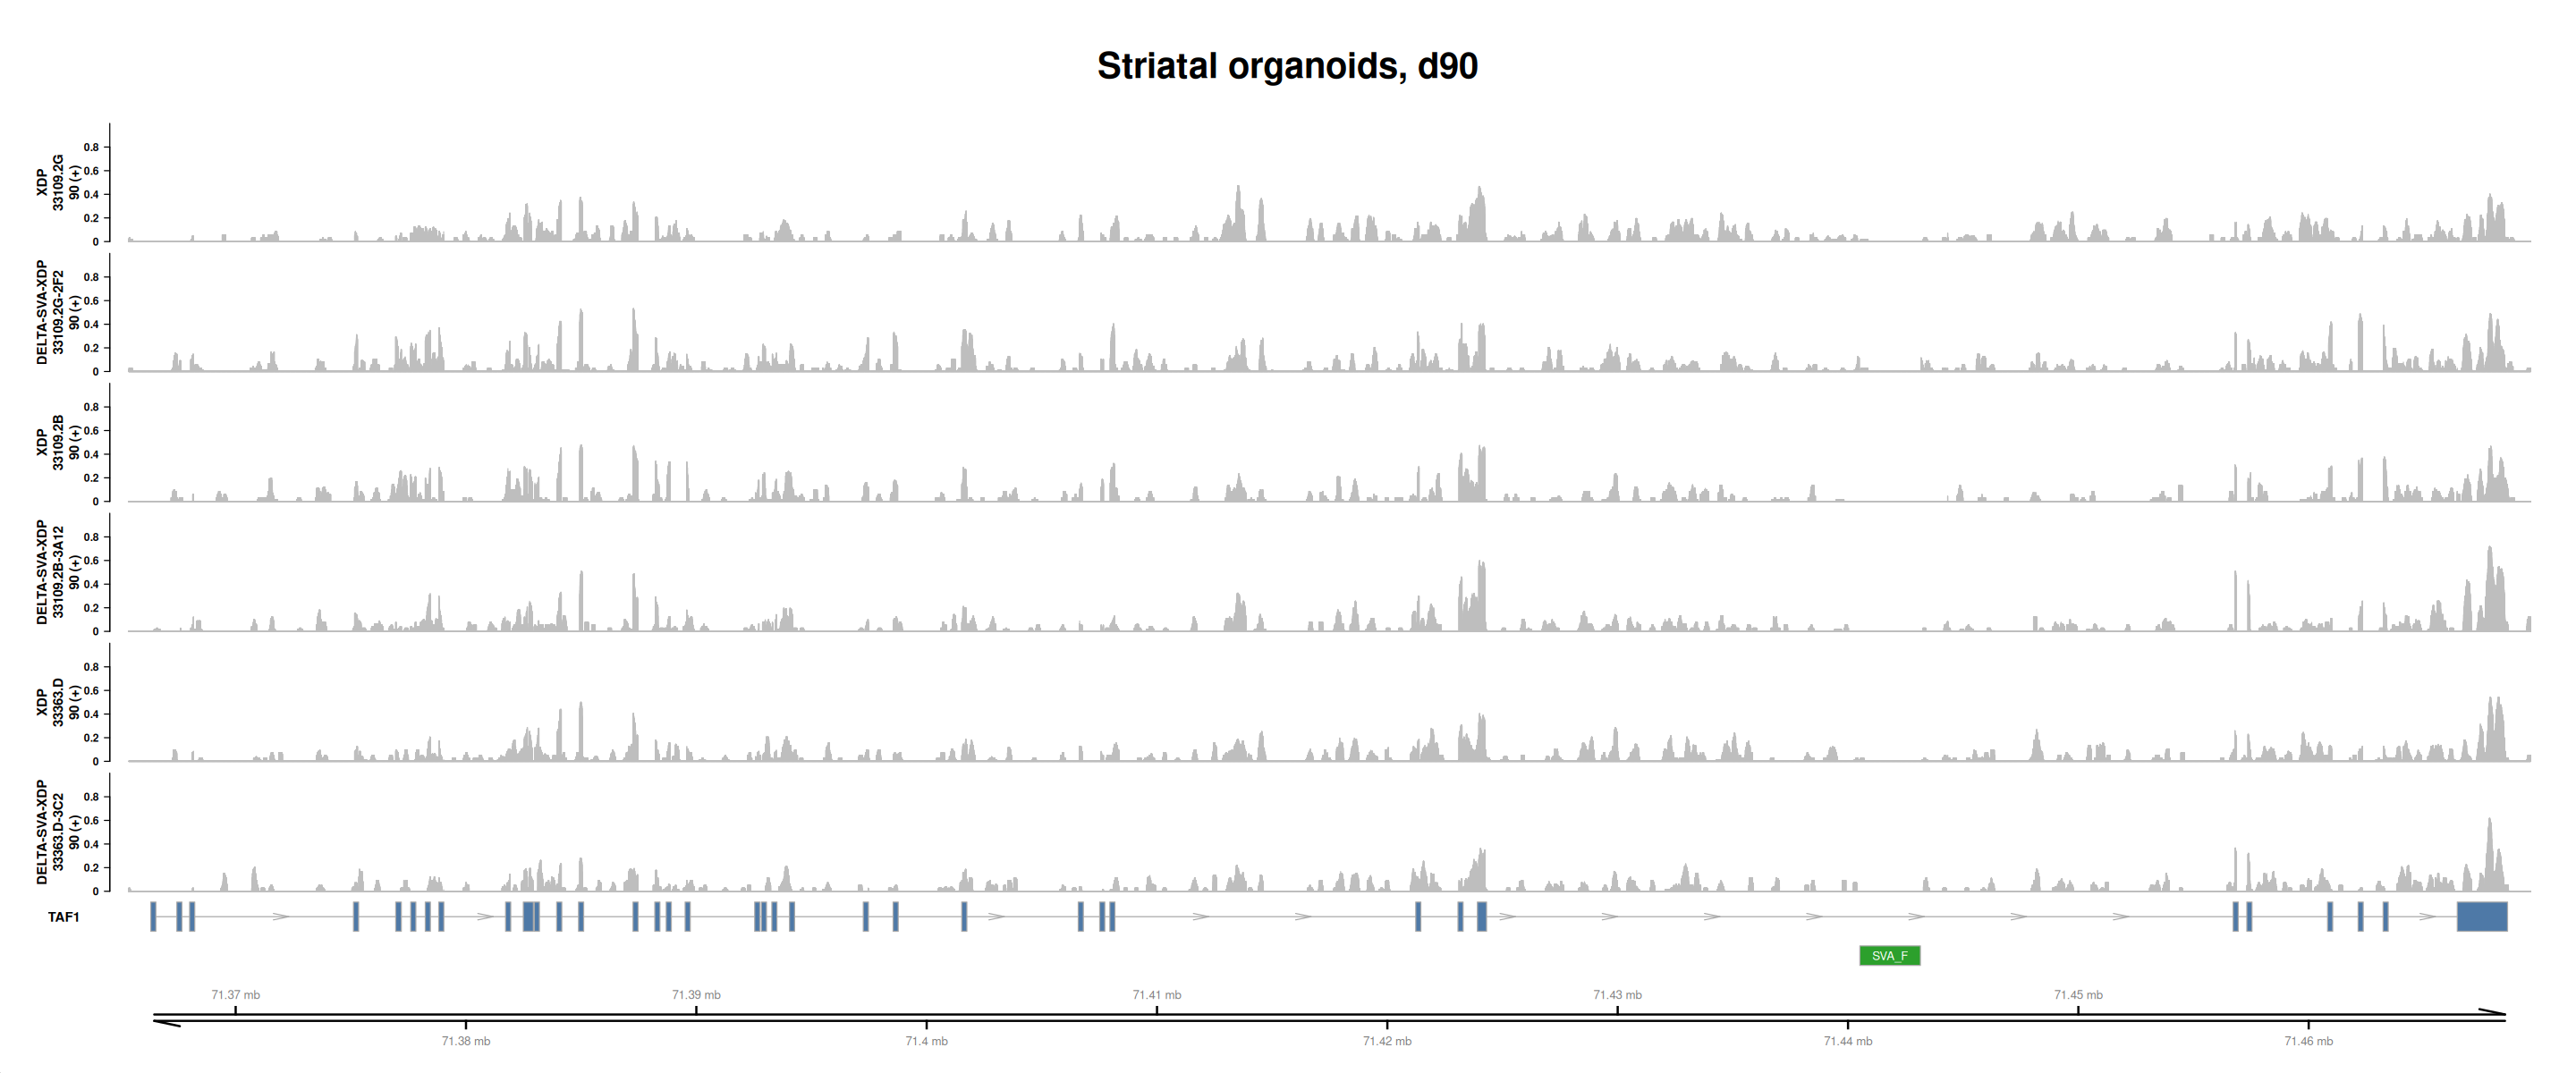

In [28]:
# subset bedgraph tracks
bedgraph_files_sub = bedgraph_tibble %>%
    filter(Cell_line != "Carrier-Mutant" & Cell_line != "Control") %>%
    # filter(Cell_line == "XDP") %>%
    filter(orientation == "forward") %>%
    filter(Day_of_Maturation == 90) %>%
    arrange(Differentiation_cohort, desc(Cell_line), Day_of_Maturation)

# Create tracks for each file
coverage_tracks = lapply(
    split(bedgraph_files_sub, 1:nrow(bedgraph_files_sub)),  # Split tibble into list of rows
    get_filepath_and_call
)

options(ucscChromosomeNames=FALSE)
options(repr.plot.width = 24, repr.plot.height = 10)
tracks_cov = c(
    coverage_tracks,
    GeneRegionTrack(taf1_model,
                    genome = genome, chromosome = "chrX", name = "TAF1", fill = "#4E79A7", size = 1.5,
                    background.title = "transparent", col.title = "black", col.axis = "black",
                    rotation.title = 0),
    AnnotationTrack(start = 71440515, end = 71443141,
                    chromosome = "chrX", name = "", id = "SVA_F",
                    showFeatureId = TRUE, size = 1.5,
                    featureAnnotation = "id", fontsize.feature = 8,
                    fill = "#2CA02C", background.title = "transparent",
                    col.title = "black", col.axis = "black"),
    GenomeAxisTrack(col = "black"))

# pdf("report__TAF1__coverage_organoids__onlycov.pdf", width = 20, height = 10)
# plotTracks(tracks_cov, chromosome = "chrX", 
#            from = transcript_start, 
#            to = transcript_end, 
#            cex.title = 0.75, 
#            title.width = 0.25)
# dev.off()

plotTracks(main = "Striatal organoids, d90",
           tracks_cov, chromosome = "chrX", 
           from = transcript_start, 
           to = transcript_end, 
           cex.title = 0.75, 
           title.width = 0.25)

### Striatal organoids (d120)

pdf 
  2

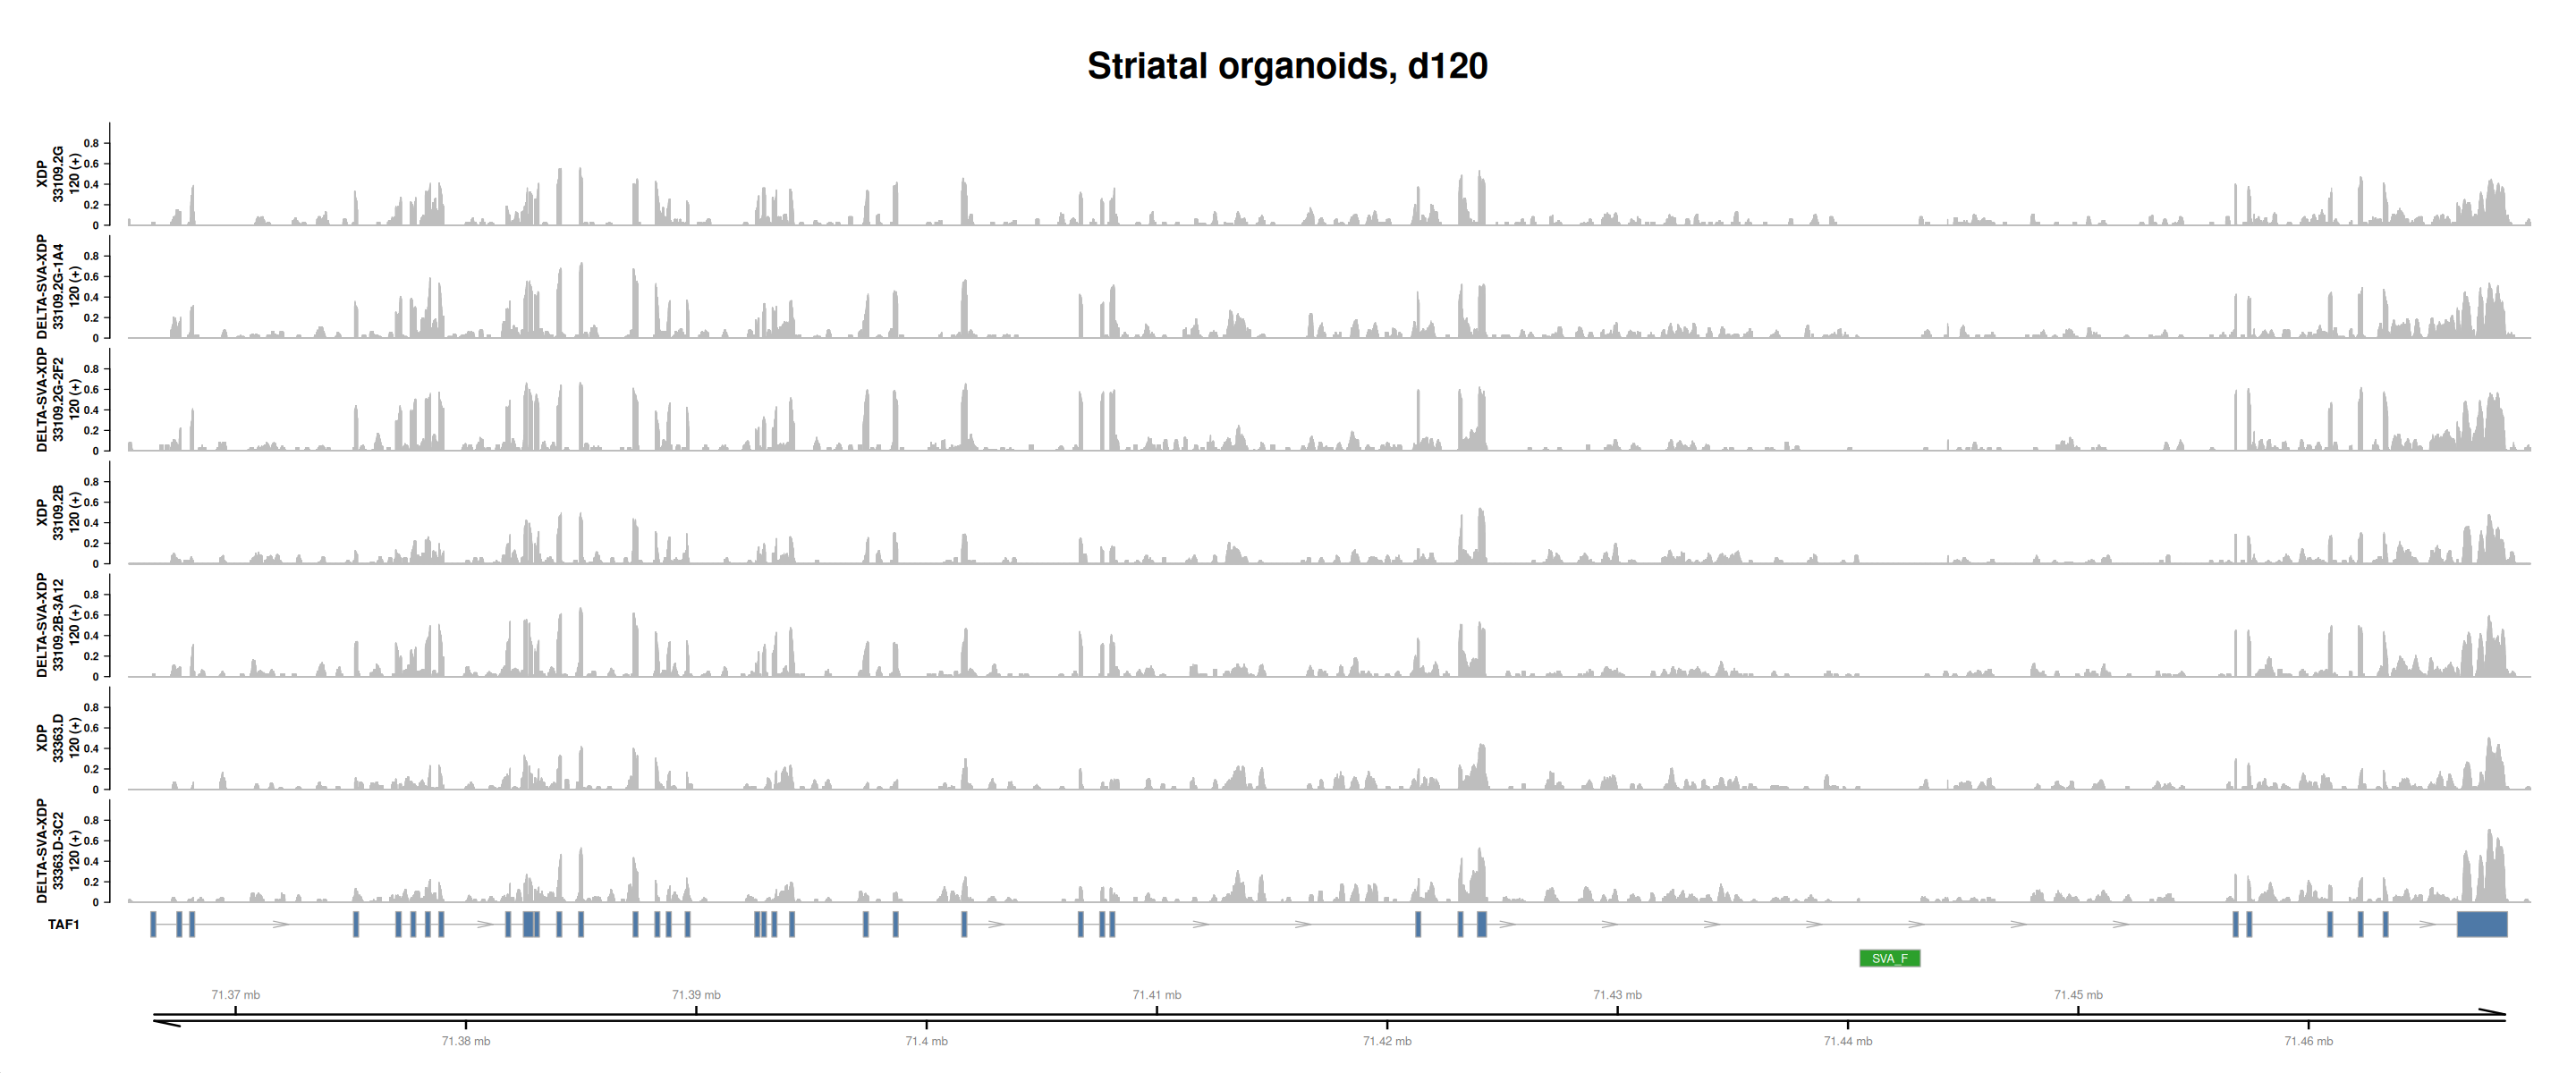

In [29]:
# subset bedgraph tracks
bedgraph_files_sub = bedgraph_tibble %>%
    filter(Cell_line != "Carrier-Mutant" & Cell_line != "Control") %>%
    # filter(Cell_line == "XDP") %>%
    filter(orientation == "forward") %>%
    filter(Day_of_Maturation == 120) %>%
    arrange(Differentiation_cohort, desc(Cell_line), Day_of_Maturation)

# Create tracks for each file
coverage_tracks = lapply(
    split(bedgraph_files_sub, 1:nrow(bedgraph_files_sub)),  # Split tibble into list of rows
    get_filepath_and_call
)

options(ucscChromosomeNames=FALSE)
options(repr.plot.width = 24, repr.plot.height = 10)
tracks_cov = c(
    coverage_tracks,
    GeneRegionTrack(taf1_model,
                    genome = genome, chromosome = "chrX", name = "TAF1", fill = "#4E79A7", size = 1.5,
                    background.title = "transparent", col.title = "black", col.axis = "black",
                    rotation.title = 0),
    AnnotationTrack(start = 71440515, end = 71443141,
                    chromosome = "chrX", name = "", id = "SVA_F",
                    showFeatureId = TRUE, size = 1.5,
                    featureAnnotation = "id", fontsize.feature = 8,
                    fill = "#2CA02C", background.title = "transparent",
                    col.title = "black", col.axis = "black"),
    GenomeAxisTrack(col = "black"))

pdf("report__TAF1__coverage_organoids__onlycov.pdf", width = 14, height = 10)
plotTracks(tracks_cov, chromosome = "chrX", 
           from = transcript_start, 
           to = transcript_end, 
           cex.title = 0.75, 
           title.width = 1.25)
dev.off()

plotTracks(main = "Striatal organoids, d120",
           tracks_cov, chromosome = "chrX", 
           from = transcript_start, 
           to = transcript_end, 
           cex.title = 0.75, 
           title.width = 0.25)

## Session Info

In [30]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libblas.so.3.12.0 
LAPACK: /usr/lib/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: EST
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] BSgenome_1.74.0      rtracklayer_1.66.0   BiocIO_1.16.0       
 [4] Biostrings_2.74.1    XVector_0.46.0       Gviz_1.50.0         
 [7] GenomicRanges_1.58.0 GenomeInfoDb_1.42.1  IRanges_2.40.1      
[10] S4Vectors_0.44.0     BiocGenerics_0.52.0  viridis